# **Comprehensive Data Analysis of S&P 500 Stock Prices**

Stock data analysis plays a crucial role in understanding and interpreting the dynamics of financial markets, and the S&P 500, being a comprehensive index representing a significant portion of the U.S. stock market, provides valuable insights for investors and analysts. Here are key points highlighting the importance of data analysis on S&P 500 stock prices:

1. **Data Collection:**
   - Gathering comprehensive data from individual stocks within the S&P 500 index is essential for a holistic market overview.
   - Data collection enables the identification of trends, patterns, and outliers that influence market behavior.

2. **Analyzing Price Changes Over Time:**
   - Examining the historical performance of S&P 500 stocks helps in understanding how market sentiments and external factors impact stock prices.
   - Moving averages and visualizations aid in identifying trends and potential investment opportunities.

3. **Resampling Analysis:**
   - Resampling data on different time scales (yearly, quarterly, monthly) provides a macroscopic view of market trends.
   - It assists in identifying seasonal patterns and long-term market cycles.

4. **Correlation Analysis:**
   - Understanding the correlation between individual stocks within the S&P 500 helps in portfolio diversification and risk management.
   - Correlation analysis reveals relationships that can influence investment decisions.

5. **Daily Returns and Percentage Changes:**
   - Analyzing daily returns and percentage changes provides insights into short-term market fluctuations.
   - It aids in risk assessment and helps investors make informed decisions on a daily basis.

6. **Pairplot and PairGrid Analysis:**
   - Visualization tools like Pairplot and PairGrid offer a comprehensive view of relationships between stocks, aiding in trend identification.
   - Correlation matrices derived from these analyses provide quantitative measures of relationships.

### **Data Collection**

In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Import glob for file path operations
import glob

In [67]:
# Set the path to the directory containing individual stock data
path = r"/content/drive/MyDrive/EDA_with_python/Stock Price Analysis - Time Series Data Analysis/individual_stocks_5yr/"

In [68]:
# Use glob to get a list of all CSV files in the specified path
stock_files = glob.glob(path + '*.csv')

In [69]:
# List of stock data files to consider for analysis
company_list = [
    path + 'AAPL_data.csv',
    path + 'AMZN_data.csv',
    path + 'GOOG_data.csv',
    path + 'MSFT_data.csv'
]

In [70]:
# Suppress future warnings using the Warnings package
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [71]:
# Initialize an empty DataFrame to store all stock data
all_data = pd.DataFrame()


In [72]:
# Loop through each file in the company list and append the data to the all_data DataFrame
for file in company_list:
    current_stock_data = pd.read_csv(file)
    all_data = current_stock_data.append(all_data, ignore_index=True)

In [73]:
# Display the dimensions of the resulting all_data DataFrame
print("Dimensions of all_data DataFrame:", all_data.shape)

Dimensions of all_data DataFrame: (4752, 7)


In [74]:
# Display the first 6 rows of the combined DataFrame
print("\nFirst 6 rows of all_data:")
print(all_data.head(6))


First 6 rows of all_data:
         date   open   high     low  close    volume  Name
0  2013-02-08  27.35  27.71  27.310  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.500  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.750  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.880  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.870  28.04  32663174  MSFT
5  2013-02-15  28.04  28.16  27.875  28.01  49650538  MSFT


In [75]:
# Display unique values in the 'Name' column of the combined DataFrame
unique_stock_names = all_data['Name'].unique()
print("\nUnique stock names in the 'Name' column:")
print(unique_stock_names)


Unique stock names in the 'Name' column:
['MSFT' 'GOOG' 'AMZN' 'AAPL']


### **Analyzing Changes in Stock Prices Over Time**

In [76]:
# Check for missing values in the DataFrame
missing_values = all_data.isnull().sum()
print("Missing values in the DataFrame:")
print(missing_values)


Missing values in the DataFrame:
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [77]:
# Display data types of each column in the DataFrame
data_types = all_data.dtypes
print("\nData types of each column:")
print(data_types)



Data types of each column:
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


In [78]:
# Convert the 'date' column to datetime data type
all_data['date'] = pd.to_datetime(all_data['date'])

In [79]:
# Display the 'date' column after conversion
print("\nConverted 'date' column:")
print(all_data['date'])


Converted 'date' column:
0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]


In [80]:
# Get a list of unique stock names in the 'Name' column
unique_stock_names = all_data['Name'].unique()
print("\nUnique stock names in the 'Name' column:")
print(unique_stock_names)


Unique stock names in the 'Name' column:
['MSFT' 'GOOG' 'AMZN' 'AAPL']


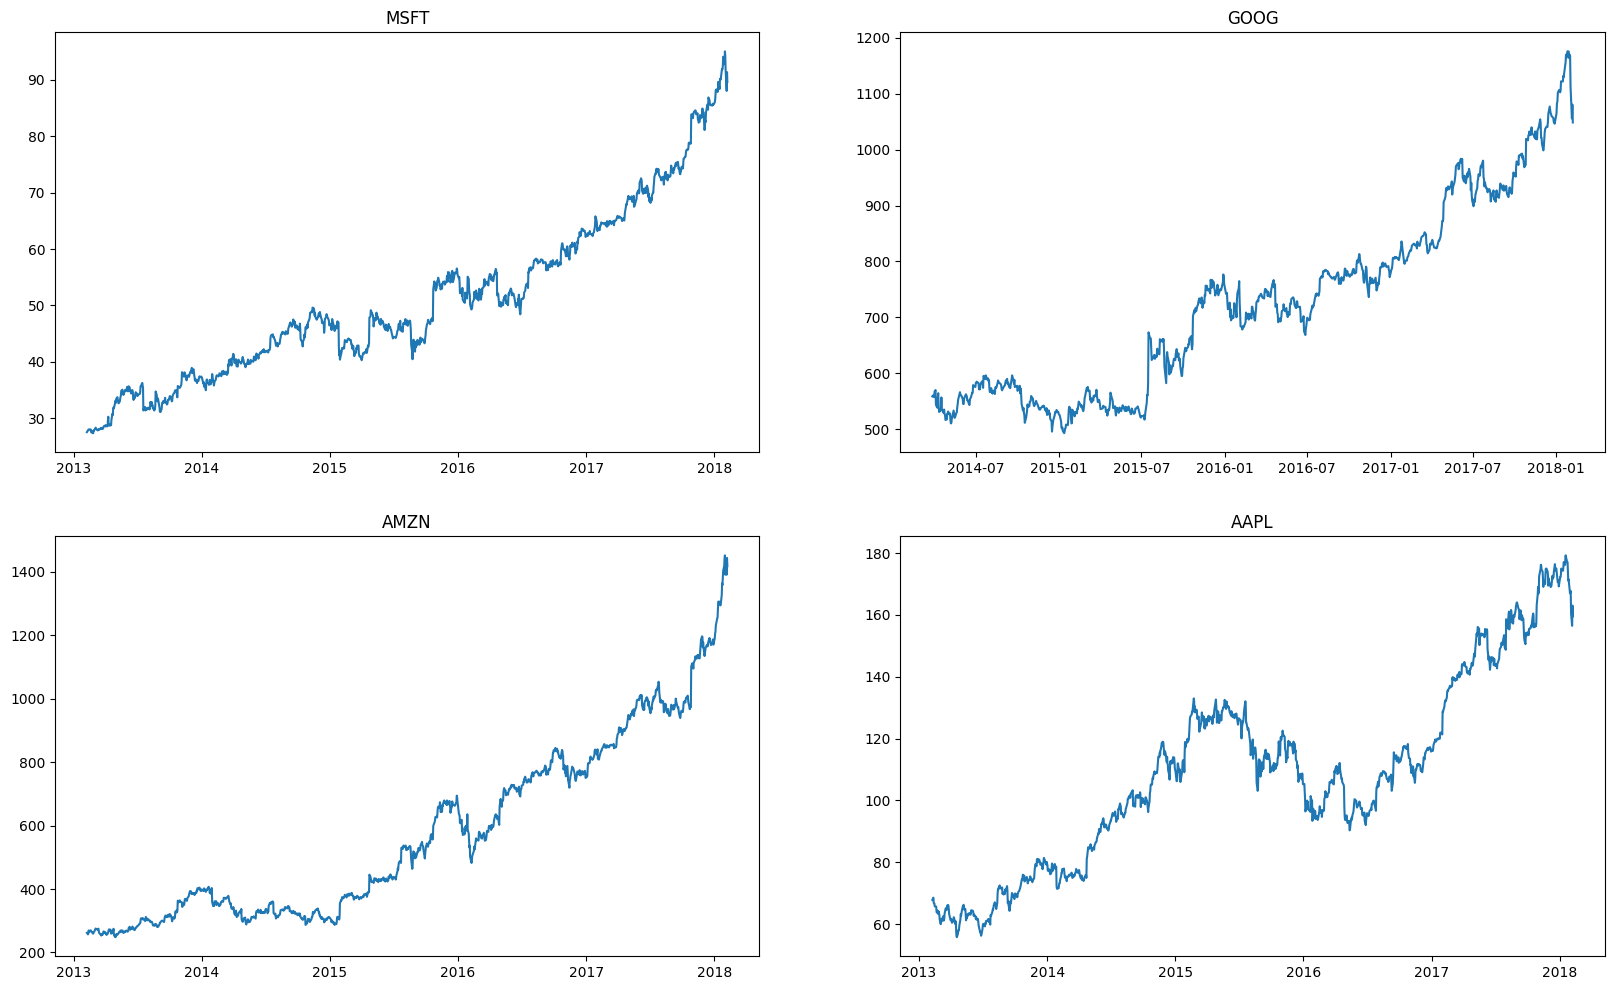

In [81]:
# Loop through each company in the tech_list
plt.figure(figsize=(20,12))
for index, company in enumerate(unique_stock_names, 1):
    plt.subplot(2, 2, index)  # Create subplot for each stock
    filter_by_company = all_data['Name'] == company
    company_data = all_data[filter_by_company]

    # Plotting date vs. close for each company
    plt.plot(company_data['date'], company_data['close'])
    plt.title(company)

# Show the plots
plt.show()

### **Moving Average of Various Stocks**

In [82]:
# Display the first 15 rows of the DataFrame
print("First 15 rows of all_data DataFrame:")
print(all_data.head(15))

First 15 rows of all_data DataFrame:
         date     open   high     low   close    volume  Name
0  2013-02-08  27.3500  27.71  27.310  27.550  33318306  MSFT
1  2013-02-11  27.6500  27.92  27.500  27.860  32247549  MSFT
2  2013-02-12  27.8800  28.00  27.750  27.880  35990829  MSFT
3  2013-02-13  27.9300  28.11  27.880  28.030  41715530  MSFT
4  2013-02-14  27.9200  28.06  27.870  28.040  32663174  MSFT
5  2013-02-15  28.0400  28.16  27.875  28.010  49650538  MSFT
6  2013-02-19  27.8801  28.09  27.800  28.045  38804616  MSFT
7  2013-02-20  28.1300  28.20  27.830  27.870  44109412  MSFT
8  2013-02-21  27.7400  27.74  27.230  27.490  49078338  MSFT
9  2013-02-22  27.6800  27.76  27.480  27.760  31425726  MSFT
10 2013-02-25  27.9700  28.05  27.370  27.370  48011248  MSFT
11 2013-02-26  27.3800  27.60  27.340  27.370  49917353  MSFT
12 2013-02-27  27.4200  28.00  27.330  27.810  36390889  MSFT
13 2013-02-28  27.8800  27.97  27.740  27.800  35836861  MSFT
14 2013-03-01  27.7200  27.98  27

In [83]:
# Calculate the 10-day rolling mean of the 'close' column
rolling_mean_10 = all_data['close'].rolling(window=10).mean().head(14)
print("\n10-day rolling mean of the 'close' column:")
print(rolling_mean_10)


10-day rolling mean of the 'close' column:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64


In [84]:
# Create a copy of the DataFrame for further processing
new_data = all_data.copy()


In [85]:
# Define different windows for rolling averages (10, 20, 50 days)
windows = [10, 20, 50]


In [86]:
# Calculate and add rolling averages for each window to the new_data DataFrame
for window in windows:
    new_data[f'close_{window}'] = new_data['close'].rolling(window=window).mean()

In [87]:
# Display the last 7 rows of the new_data DataFrame
print("\nLast 7 rows of new_data DataFrame:")
print(new_data.tail(7))


Last 7 rows of new_data DataFrame:
           date     open      high       low   close    volume  Name  \
4745 2018-01-30  165.525  167.3700  164.7000  166.97  46048185  AAPL   
4746 2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
4747 2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
4748 2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
4749 2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
4750 2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
4751 2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

      close_10  close_20  close_50  
4745   174.263  174.3340  172.9460  
4746   173.096  174.0925  172.8726  
4747   171.948  173.8700  172.8252  
4748   170.152  173.2435  172.6356  
4749   168.101  172.3180  172.3026  
4750   166.700  171.7520  172.0640  
4751   165.232  171.0125  171.7554  


In [88]:
# Set the 'date' column as the index
new_data.set_index('date', inplace=True)


In [89]:
# Display the new_data DataFrame with updated index
print("\nnew_data DataFrame with 'date' as index:")
print(new_data)


new_data DataFrame with 'date' as index:
               open    high       low   close    volume  Name  close_10  \
date                                                                      
2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT       NaN   
2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT       NaN   
2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT       NaN   
2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT       NaN   
2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT       NaN   
...             ...     ...       ...     ...       ...   ...       ...   
2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   171.948   
2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   170.152   
2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   168.101   
2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   166.700   
2018-02-07  163.085  163.40  159.0685  159.54  51608580  A

In [90]:
# Display the columns of the new_data DataFrame
print("\nColumns of new_data DataFrame:")
print(new_data.columns)


Columns of new_data DataFrame:
Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')


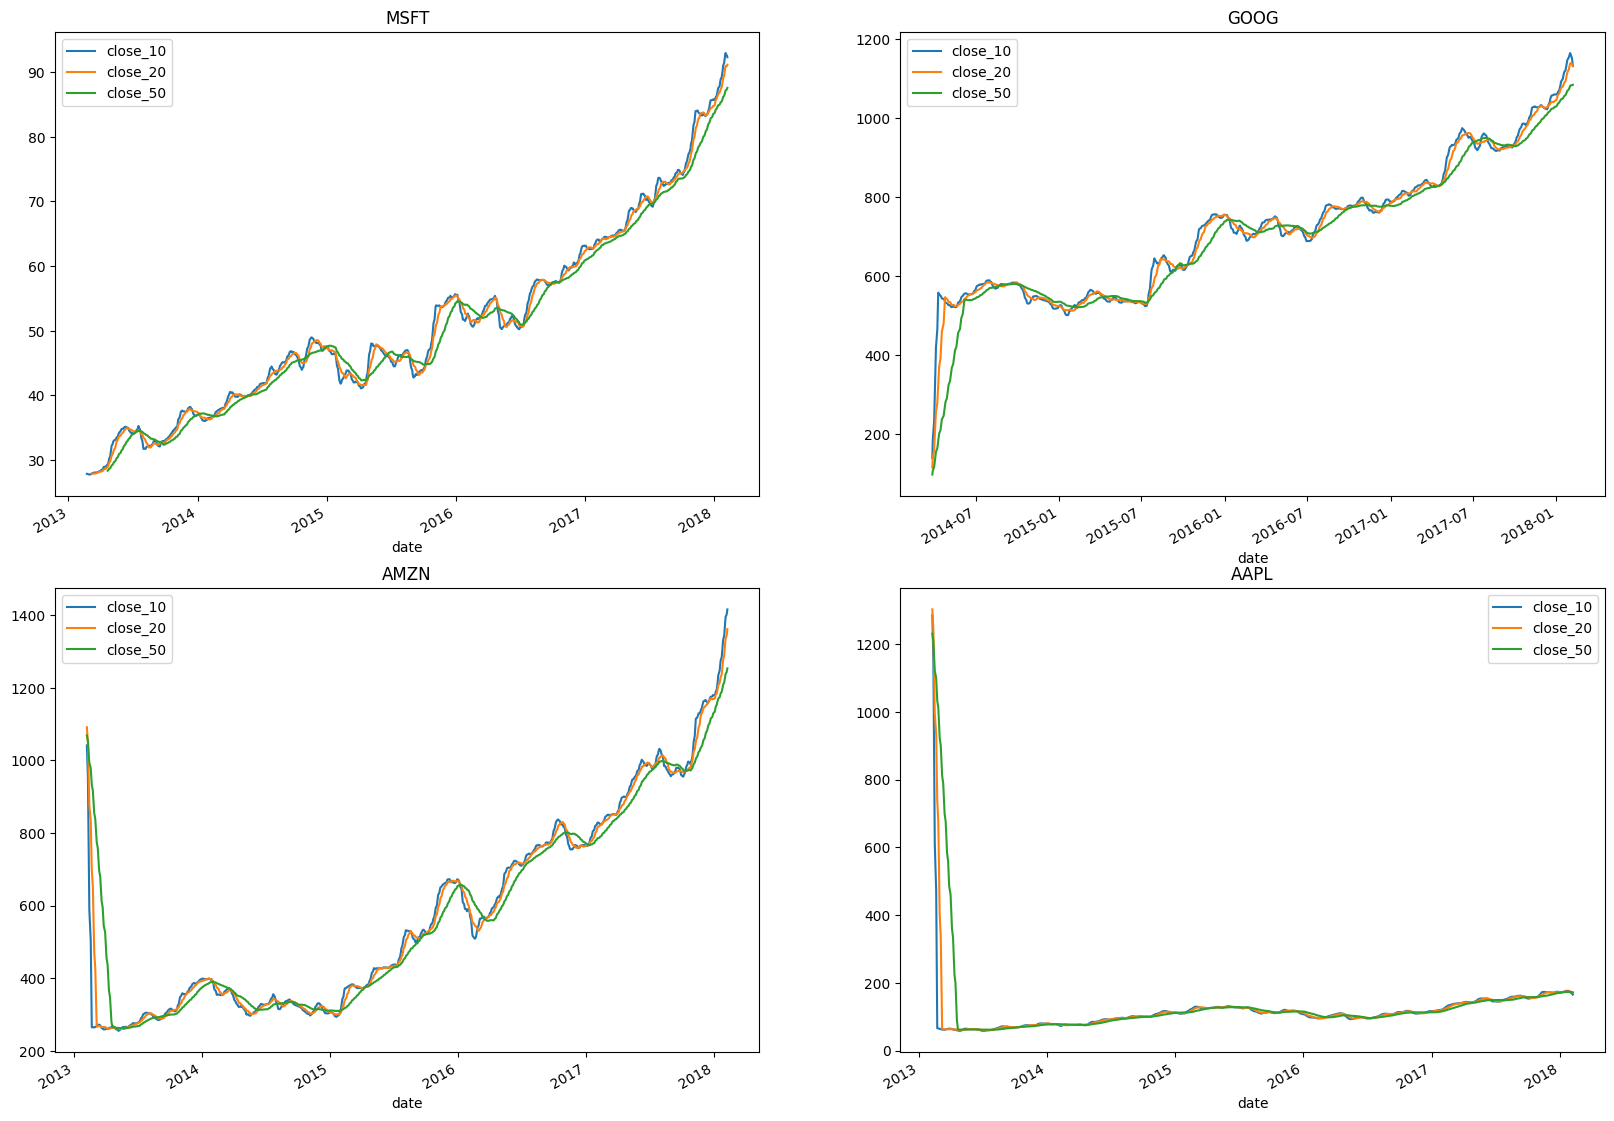

In [123]:
# Plotting moving averages for each company
plt.figure(figsize=(20, 15))

# Loop through each company in the tech_list
for index, company in enumerate(unique_stock_names, 1):
    plt.subplot(2, 2, index)
    filter_by_company = new_data['Name'] == company
    company_data = new_data[filter_by_company]

    # Plotting different moving averages for each company
    company_data[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# Show the plots
plt.show()


### **Analyzing Closing Price Change in Apple Stock**

List of stock data files to consider for analysis (already defined)
+ company_list = [path + 'AAPL_data.csv', path + 'AMZN_data.csv', path + 'GOOG_data.csv', path + 'MSFT_data.csv']

In [92]:
# Load the Apple stock data
apple = pd.read_csv(path + 'AAPL_data.csv')

In [93]:
# Display the first 4 rows of the Apple stock data
print("First 4 rows of Apple stock data:")
print(apple.head(4))


First 4 rows of Apple stock data:
         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL


In [94]:
# Extract the 'close' column from the Apple stock data
apple_close_prices = apple['close']

In [95]:
# Display the first 4 values of the 'close' column
print("\nFirst 4 values of the 'close' column:")
print(apple_close_prices.head(4))


First 4 values of the 'close' column:
0    67.8542
1    68.5614
2    66.8428
3    66.7156
Name: close, dtype: float64


In [96]:
# Calculate the daily return percentage for Apple stock
apple['Daily return(in %)'] = apple_close_prices.pct_change() * 100

In [97]:
# Display the first 4 rows of the Apple stock data with the new 'Daily return(in %)' column
print("\nFirst 4 rows of Apple stock data with 'Daily return(in %)' column:")
print(apple.head(4))



First 4 rows of Apple stock data with 'Daily return(in %)' column:
         date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297  


In [98]:
# Plotting line plot of "date" vs "Daily return(in %)" using Plotly Express
import plotly.express as px

fig = px.line(apple, x="date", y="Daily return(in %)", title="Apple Stock Daily Returns")
fig.show()


### **Performing Resampling Analysis of Closing Price**

In [99]:
# Display data types of each column in the Apple stock data
print("Data types of each column in the Apple stock data:")
print(apple.dtypes)

Data types of each column in the Apple stock data:
date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object


In [100]:
# Convert the 'date' column to datetime data type
apple['date'] = pd.to_datetime(apple['date'])

# Display data types after converting the 'date' column
print("\nData types after converting 'date' column:")
print(apple.dtypes)


Data types after converting 'date' column:
date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object


In [101]:
# Display the first 4 rows of the Apple stock data after converting the 'date' column
print("\nFirst 4 rows of Apple stock data after converting 'date' column:")
print(apple.head(4))


First 4 rows of Apple stock data after converting 'date' column:
        date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297  


In [102]:
# Set the 'date' column as the index
apple.set_index('date', inplace=True)

# Display the first 4 rows of the Apple stock data with 'date' as the index
print("\nFirst 4 rows of Apple stock data with 'date' as the index:")
print(apple.head(4))



First 4 rows of Apple stock data with 'date' as the index:
               open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

            Daily return(in %)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235  
2013-02-12           -2.506658  
2013-02-13           -0.190297  


In [103]:
# Resample data on a monthly basis and calculate the mean closing price
monthly_mean = apple['close'].resample('M').mean()

# Display the mean closing price on a monthly basis
print("\nResampled data on a monthly basis - Mean closing price:")
print(monthly_mean)


Resampled data on a monthly basis - Mean closing price:
date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64


<Axes: title={'center': 'Mean Closing Price - Monthly Resampling'}, xlabel='date'>

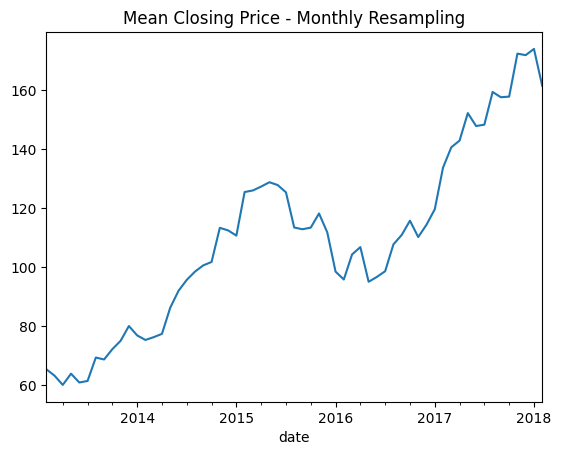

In [104]:
# Plotting the mean closing price on a monthly basis
monthly_mean.plot(title="Mean Closing Price - Monthly Resampling")

In [105]:
# Resample data on a yearly basis and calculate the mean closing price
yearly_mean = apple['close'].resample('Y').mean()

# Display the mean closing price on a yearly basis
print("\nResampled data on a yearly basis - Mean closing price:")
print(yearly_mean)


Resampled data on a yearly basis - Mean closing price:
date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64


<Axes: title={'center': 'Mean Closing Price - Yearly Resampling'}, xlabel='date'>

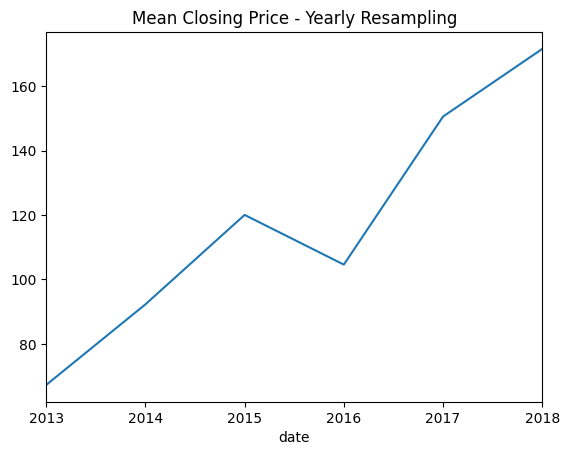

In [106]:
# Plotting the mean closing price on a yearly basis
yearly_mean.plot(title="Mean Closing Price - Yearly Resampling")

In [107]:
# Resample data on a quarterly basis and calculate the mean closing price
quarterly_mean = apple['close'].resample('Q').mean()

# Display the mean closing price on a quarterly basis
print("\nResampled data on a quarterly basis - Mean closing price:")
print(quarterly_mean)



Resampled data on a quarterly basis - Mean closing price:
date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64


<Axes: title={'center': 'Mean Closing Price - Quarterly Resampling'}, xlabel='date'>

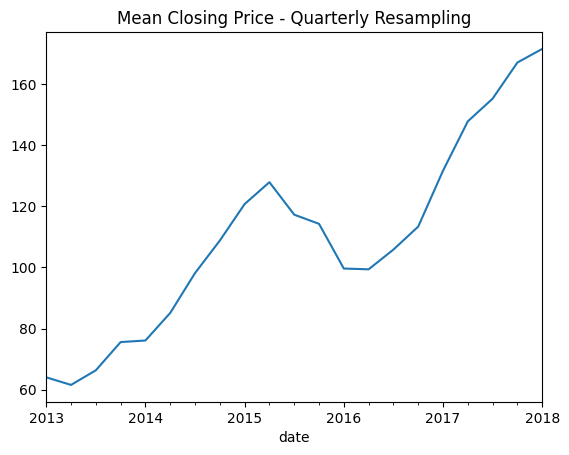

In [108]:
# Plotting the mean closing price on a quarterly basis
quarterly_mean.plot(title="Mean Closing Price - Quarterly Resampling")

### **Correlation Analysis of Closing Prices for Tech Companies**

In [109]:
# Load individual stock data for each company
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [110]:
# Create a DataFrame to store closing prices of different tech companies
closing_price = pd.DataFrame()

In [111]:
# Assign closing prices to the DataFrame columns
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

# Display the closing_price DataFrame
print("Closing Price DataFrame:")
print(closing_price)

Closing Price DataFrame:
      apple_close  amzn_close  goog_close  msft_close
0         67.8542      261.95      558.46       27.55
1         68.5614      257.21      559.99       27.86
2         66.8428      258.70      556.97       27.88
3         66.7156      269.47      567.16       28.03
4         66.6556      269.24      567.00       28.04
...           ...         ...         ...         ...
1254     167.7800     1390.00         NaN       94.26
1255     160.5000     1429.95         NaN       91.78
1256     156.4900     1390.00         NaN       88.00
1257     163.0300     1442.84         NaN       91.33
1258     159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]


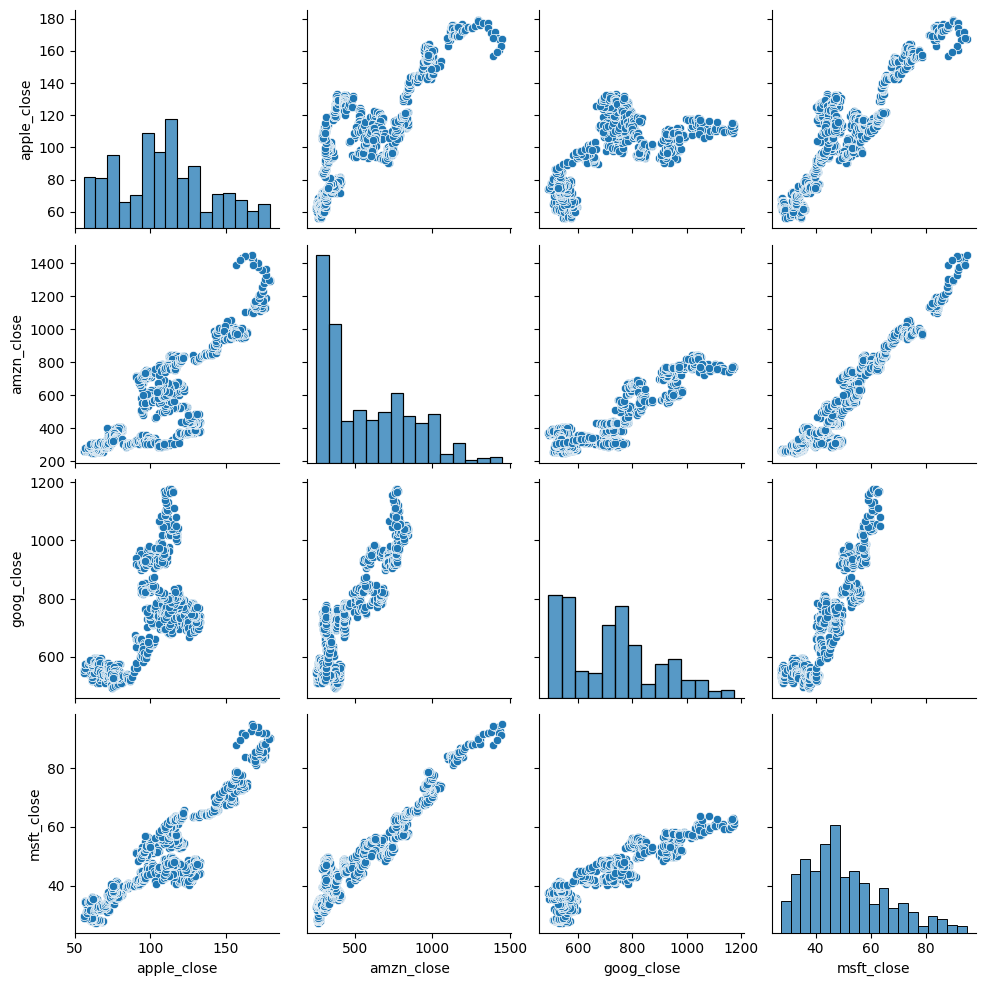

In [112]:
# Pair-plot to visualize relationships between closing prices of different companies
sns.pairplot(closing_price)

In [113]:
# Calculate the correlation matrix for closing prices
correlation_matrix = closing_price.corr()

<Axes: >

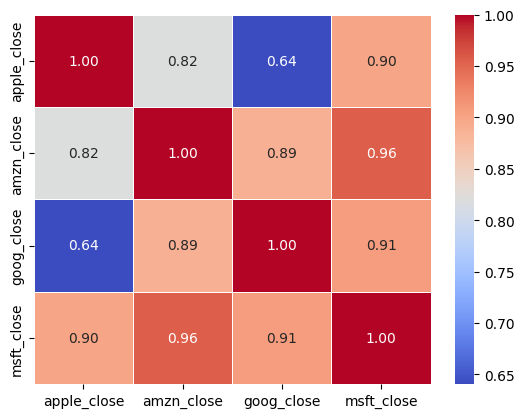

In [114]:
# Display the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


Conclusions:
- Closing price of Google and Microsoft are well correlated.
- Closing price of Amazon and Microsoft have a correlation of 0.96.

### **Correlation Analysis of Daily Change in Closing Prices (Daily Returns) for Tech Companies**


In [115]:
# Display the closing_price DataFrame
print("Closing Price DataFrame:")
print(closing_price)

Closing Price DataFrame:
      apple_close  amzn_close  goog_close  msft_close
0         67.8542      261.95      558.46       27.55
1         68.5614      257.21      559.99       27.86
2         66.8428      258.70      556.97       27.88
3         66.7156      269.47      567.16       28.03
4         66.6556      269.24      567.00       28.04
...           ...         ...         ...         ...
1254     167.7800     1390.00         NaN       94.26
1255     160.5000     1429.95         NaN       91.78
1256     156.4900     1390.00         NaN       88.00
1257     163.0300     1442.84         NaN       91.33
1258     159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]


In [116]:
# Extract the 'apple_close' column from the closing_price DataFrame
apple_close = closing_price['apple_close']

In [117]:
# Calculate the daily percentage change for the 'apple_close' column
apple_close_pct_change = (apple_close - apple_close.shift(1)) / apple_close.shift(1) * 100

# Create a new DataFrame for daily percentage changes of each company
daily_pct_change = pd.DataFrame()

# Calculate daily percentage change for each column in closing_price DataFrame
for col in closing_price.columns:
    daily_pct_change[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100

# Display the DataFrame with daily percentage changes
print("\nDataFrame with Daily Percentage Changes:")
print(daily_pct_change)


DataFrame with Daily Percentage Changes:
      apple_close_pct_change  amzn_close_pct_change  goog_close_pct_change  \
0                        NaN                    NaN                    NaN   
1                   1.042235              -1.809506               0.273968   
2                  -2.506658               0.579293              -0.539295   
3                  -0.190297               4.163123               1.829542   
4                  -0.089934              -0.085353              -0.028211   
...                      ...                    ...                    ...   
1254                0.209043              -4.196734                    NaN   
1255               -4.339015               2.874101                    NaN   
1256               -2.498442              -2.793804                    NaN   
1257                4.179181               3.801439                    NaN   
1258               -2.140710              -1.806160                    NaN   

      msft_close_pct_

In [118]:
# Display the columns of the daily_pct_change DataFrame
print("\nColumns of the daily_pct_change DataFrame:")
print(daily_pct_change.columns)




Columns of the daily_pct_change DataFrame:
Index(['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')


In [119]:
# Extract relevant columns for PairGrid analysis
clsing_p = daily_pct_change[['apple_close_pct_change', 'amzn_close_pct_change', 'goog_close_pct_change', 'msft_close_pct_change']]

# Display the relevant columns for PairGrid analysis
print("\nSelected columns for PairGrid analysis:")
print(clsing_p)


Selected columns for PairGrid analysis:
      apple_close_pct_change  amzn_close_pct_change  goog_close_pct_change  \
0                        NaN                    NaN                    NaN   
1                   1.042235              -1.809506               0.273968   
2                  -2.506658               0.579293              -0.539295   
3                  -0.190297               4.163123               1.829542   
4                  -0.089934              -0.085353              -0.028211   
...                      ...                    ...                    ...   
1254                0.209043              -4.196734                    NaN   
1255               -4.339015               2.874101                    NaN   
1256               -2.498442              -2.793804                    NaN   
1257                4.179181               3.801439                    NaN   
1258               -2.140710              -1.806160                    NaN   

      msft_close_pct_c

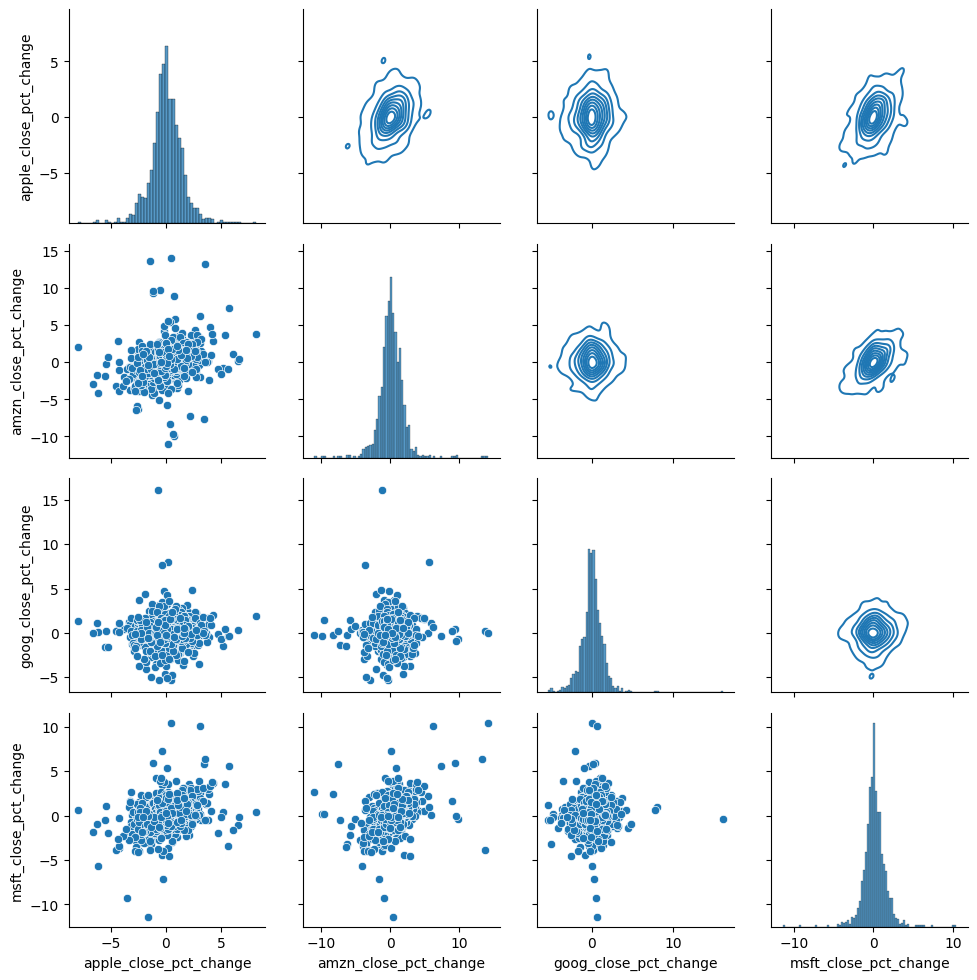

In [120]:
# PairGrid to visualize relationships between daily percentage changes of different companies
g = sns.PairGrid(data=clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [121]:
# Calculate the correlation matrix for daily percentage changes
correlation_matrix_pct_change = clsing_p.corr()

# Display the correlation matrix for daily percentage changes
print("\nCorrelation Matrix for Daily Percentage Changes:")
print(correlation_matrix_pct_change)



Correlation Matrix for Daily Percentage Changes:
                        apple_close_pct_change  amzn_close_pct_change  \
apple_close_pct_change                1.000000               0.287659   
amzn_close_pct_change                 0.287659               1.000000   
goog_close_pct_change                 0.036202               0.027698   
msft_close_pct_change                 0.366598               0.402678   

                        goog_close_pct_change  msft_close_pct_change  
apple_close_pct_change               0.036202               0.366598  
amzn_close_pct_change                0.027698               0.402678  
goog_close_pct_change                1.000000               0.038939  
msft_close_pct_change                0.038939               1.000000  


Conclusion:
While comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change', it shows a linear relationship up to some extent.